# עבודת גמר הדמיית נתונים

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import glob
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.ensemble import VotingClassifier

## חלק ראשון:


In [4]:
# https://www.kaggle.com/uciml/forest-cover-type-dataset
# https://towardsdatascience.com/ensemble-learning-using-scikit-learn-85c4531ff86a

In [5]:
# df = pd.read_csv(r'C:\Users\user\Desktop\Exel files\covtype.csv')

In [6]:
# df.describe()

## חלק שני:


In [7]:
training_path = r'C:\Users\user\Desktop\Exel files\semester_2_final\Training'

In [8]:
Evyatar_Cohen_Spontan = '\Evyatar Cohen\Evyatar636771052727603804Spontan.csv'
Evyatar_Cohen_Sync = '\Evyatar Cohen\Evyatar636771053639929594Sync.csv'
Evyatar_Cohen_Alone = '\Evyatar Cohen\Evyatar636771054555711409Alone.csv'

In [9]:
Namecunter = 0

In [10]:
df1 = pd.read_csv(training_path+Evyatar_Cohen_Alone)
df2 = pd.read_csv(training_path+Evyatar_Cohen_Sync)
df3 = pd.read_csv(training_path+Evyatar_Cohen_Spontan)

df1['Name'] = df2['Name'] = df3['Name'] = Namecunter
Namecunter = Namecunter+1
df1['Experiment Mode'] = 0 #'Alone'
df2['Experiment Mode'] = 1 #'Sync'
df3['Experiment Mode'] = 2 #'Spontan'

In [11]:
len(df2)

9052

In [12]:
HandRight_path = r'C:\Users\user\Desktop\Exel files\semester_2_final\HandRight.csv'
HandRight = pd.read_csv(HandRight_path)

In [13]:
columns = ['Time', ' Frame ID', ' # hands', 'Name', 'Experiment Mode',
            'Left Position X','Left Position Y', 'Left Position Z', 'Left Velocity X', 'Left Velocity Y',
            'Left Velocity Z', 'Left Pitch', 'Left Roll', 'Left Yaw', 'Left Wrist Pos X',
            'Left Wrist Pos Y', 'Left Wrist Pos Z', 'Left Elbow pos X', 'Left Elbow Pos Y',
            'Left Elbow Pos Z', 'Left Grab Strenth', 'Left Grab Angle', 'Left Pinch Strength',
            'Right Position X','Right Position Y', 'Right Position Z', 'Right Velocity X', 'Right Velocity Y',
            'Right Velocity Z', 'Right Pitch', 'Right Roll', 'Right Yaw', 'Right Wrist Pos X',
            'Right Wrist Pos Y', 'Right Wrist Pos Z', 'Right Elbow pos X', 'Right Elbow Pos Y',
            'Right Elbow Pos Z', 'Right Grab Strenth', 'Right Grab Angle', 'Right Pinch Strength']
columns0 = ['Time', ' Frame ID',  ' # hands','Name', 'Experiment Mode']

columns1 = [' Position X',' Position Y', ' Position Z', ' Velocity X', ' Velocity Y',
           ' Velocity Z', ' Pitch', ' Roll', ' Yaw', ' Wrist Pos X',
           ' Wrist Pos Y', ' Wrist Pos Z', ' Elbow pos X', ' Elbow Pos Y',
           ' Elbow Pos Z', ' Grab Strenth', ' Grab Angle', ' Pinch Strength']
columns2 = [['Time', ' Frame ID', ' Hand Type', ' # hands','Name', 'Experiment Mode',
            ' Position X',' Position X', ' Position Y',' Position Y', ' Position Z',' Position Z',
             ' Velocity X',' Velocity X', ' Velocity Y',' Velocity Y',  ' Velocity Z', ' Velocity Z', 
             ' Pitch',' Pitch', ' Roll',' Roll', ' Yaw',' Yaw', ' Wrist Pos X',' Wrist Pos X',
             ' Wrist Pos Y',' Wrist Pos Y', ' Wrist Pos Z',' Wrist Pos Z', ' Elbow pos X',' Elbow pos X', 
             ' Elbow Pos Y',' Elbow Pos Y',' Elbow Pos Z',' Elbow Pos Z', ' Grab Strenth',' Grab Strenth', 
             ' Grab Angle', ' Grab Angle', ' Pinch Strength',' Pinch Strength'],
            [' ',' ',' ',' ',' ',' ',
             'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
             'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
             'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
             'Left','Right','Left','Right','Left','Right']]

In [14]:
def nogg(df):
    df = df.reset_index()
    df = df.drop(['index'],axis=1)
    return df

In [15]:
columnsdf1 = df1.columns
# cunter = 0
def get_Alone_df(new_df):
    tempdf0 = DataFrame(columns=columnsdf1)
    tempdf0 = tempdf0.append(new_df[new_df[' Hand Type']=='left'])
    tempdf0 = tempdf0.reset_index()
    del tempdf0['index']

    ezhafe = DataFrame(columns=columns2)
    tempdf = DataFrame(columns=columnsdf1)
    tempdf = tempdf.append(new_df)
    tempdf = tempdf.reset_index()
    del tempdf['index']
    for x in columns1:
        ezhafe[x] = tempdf[x]
    for x in columns1:
        ezhafe[x,'Right'] = HandRight[x].copy()#[cunter:]
#         cunter = cunter+1
#     HandRight = HandRight.drop([0])
    for x in columns0:
        ezhafe[x,' '] = tempdf0[x]
#     HandRight = nogg(HandRight.iloc[1:])

    final_df = DataFrame(ezhafe, columns=ezhafe.columns)
    final_df = DataFrame(final_df, columns=[['Time', ' Frame ID', ' # hands','Name', 'Experiment Mode',
            ' Position X',' Position X', ' Position Y',' Position Y', ' Position Z',' Position Z',
             ' Velocity X',' Velocity X', ' Velocity Y',' Velocity Y',  ' Velocity Z', ' Velocity Z', 
             ' Pitch',' Pitch', ' Roll',' Roll', ' Yaw',' Yaw', ' Wrist Pos X',' Wrist Pos X',
             ' Wrist Pos Y',' Wrist Pos Y', ' Wrist Pos Z',' Wrist Pos Z', ' Elbow pos X',' Elbow pos X', 
             ' Elbow Pos Y',' Elbow Pos Y',' Elbow Pos Z',' Elbow Pos Z', ' Grab Strenth',' Grab Strenth', 
             ' Grab Angle', ' Grab Angle', ' Pinch Strength',' Pinch Strength'],#42
            [' ',' ',' ',' ',' ',
             'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
             'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
             'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
             'Left','Right','Left','Right','Left','Right']])

    final_df = final_df[final_df.index%20==0]
    final_df = final_df[final_df.index>=700]
    final_df = nogg(final_df)#.reset_index
    final_df = final_df
    return final_df.iloc[:187]

In [16]:
df1 =  get_Alone_df(df1)

In [17]:
df1

Time  Frame ID  # hands Name Experiment Mode  Position X              \
                                                             Left       Right   
0    530.4075    150957        1    0               0  -62.140160   27.550410   
1    530.7388    150995        1    0               0  -65.600780   59.588350   
2    531.0707    151034        1    0               0  -58.676210   -1.415332   
3    531.4015    151072        1    0               0    7.721432   21.429370   
4    531.7335    151110        1    0               0  -12.412200   30.922420   
5    532.0648    151148        1    0               0  -72.244350   28.444010   
6    532.3961    151186        1    0               0  -64.138370   13.982810   
7    532.7275    151225        1    0               0  -27.831140   63.945620   
8    533.0588    151263        1    0               0  -68.380030   32.937330   
9    533.3906    151301        1    0               0  -47.773790  -10.769240   
10   533.7215    151339        1    0               0   -6.808535   52.291550   
11   534.0528    151378        1    0               0  -39.084970   -6.102429   
12   534.3842    151416        1    0               0  -88.216880   44.336920   
13   534.7155    151454        1    0               0  -23.440560   37.212130   
14   535.0468    151492        1    0               0   -9.791813  -45.376830   
15   535.3781    151530        1    0               0  -29.044510   59.936190   
16   535.7096    151569        1    0               0 -107.775500   23.266200   
17   536.0408    151607        1    0               0  -64.711450    8.520751   
18   536.3721    151645        1    0               0  -25.716200   28.907850   
19   536.7035    151683        1    0               0  -13.469760   20.919410   
20   537.0349    151721        1    0               0   22.013420   70.195560   
21   537.3668    151760        1    0               0    9.608245  175.627400   
22   537.6978    151798        1    0               0  -37.865980    1.621418   
23   538.0288    151836        1    0               0 -109.819700    1.092861   
24   538.3603    151874        1    0               0  -70.605830   11.092830   
25   538.6924    151913        1    0               0  -79.435390   29.743940   
26   539.0228    151951        1    0               0  -85.336250   31.372920   
27   539.3541    151989        1    0               0  -73.745480   51.757420   
28   539.6855    152027        1    0               0  -78.720190   55.039450   
29   540.0173    152065        1    0               0  -82.268260  192.791300   
..        ...       ...      ...  ...             ...         ...         ...   
157  582.4352    156954        1    0               0 -116.562200   40.380440   
158  582.7665    156992        1    0               0  -77.916340   73.124050   
159  583.0974    157030        1    0               0  -55.380070  -14.712820   
160  583.4290    157068        1    0               0 -121.038500  -21.465860   
161  583.7601    157107        1    0               0 -103.138000   22.037350   
162  584.0915    157145        1    0               0  -47.999150  103.465200   
163  584.4231    157183        1    0               0  -39.938980   40.021390   
164  584.7542    157221        1    0               0  -91.090390  -24.785410   
165  585.0854    157259        1    0               0  -68.909190    8.942218   
166  585.4167    157297        1    0               0  -54.075160   -6.883192   
167  585.7481    157336        1    0               0  -61.568860  -26.934990   
168  586.0795    157374        1    0               0  -75.130460    5.506620   
169  586.4108    157412        1    0               0  -75.641870  -21.063880   
170  586.7422    157450        1    0               0  -50.786800    1.700390   
171  587.0735    157488        1    0               0  -45.063430  -19.603590   
172  587.4048    157526        1    0               0  -59.115760  -55.610290   
173  587.7369    157564        1    0   

In [18]:
def get_Spontan_or_Sync_df(new_df):
    hardhafe = DataFrame(columns=columns2)
    tempdf = DataFrame(columns=new_df.columns)
    tempdf = tempdf.append(new_df)
    tempdf = tempdf.reset_index()
    del tempdf['index']

    temp = tempdf[tempdf[' Hand Type']=='left']
    temp = temp.reset_index()
    del temp['index']
    for x in columns1:
        hardhafe[x]= temp[x]
        hardhafe[x,'Right']= np.nan
    for x in columns0:
        hardhafe[x,' ']= temp[x]

    temp = tempdf[tempdf[' Hand Type']=='right']
    temp = temp.reset_index()
    del temp['index']
    for x in columns1:
        hardhafe[x,'Right']= temp[x]
    for x in columns0:
        hardhafe[x,' ']= temp[x]
    hardhafe = hardhafe.drop(columns=[' Hand Type'])

    final_df = DataFrame(hardhafe,columns=hardhafe.columns)
    final_df = final_df.reset_index()
    del final_df['index']
    final_df = DataFrame(final_df,columns=[['Time', ' Frame ID', ' # hands', 'Name', 'Experiment Mode',
                ' Position X',' Position X', ' Position Y',' Position Y', ' Position Z',' Position Z',
                 ' Velocity X',' Velocity X', ' Velocity Y',' Velocity Y',  ' Velocity Z', ' Velocity Z', 
                 ' Pitch',' Pitch', ' Roll',' Roll', ' Yaw',' Yaw', ' Wrist Pos X',' Wrist Pos X',
                 ' Wrist Pos Y',' Wrist Pos Y', ' Wrist Pos Z',' Wrist Pos Z', ' Elbow pos X',' Elbow pos X', 
                 ' Elbow Pos Y',' Elbow Pos Y',' Elbow Pos Z',' Elbow Pos Z', ' Grab Strenth',' Grab Strenth', 
                 ' Grab Angle', ' Grab Angle', ' Pinch Strength',' Pinch Strength'],#42
                [' ',' ',' ',' ',' ',
                 'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
                 'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
                 'Left','Right','Left','Right','Left','Right','Left','Right','Left','Right',
                 'Left','Right','Left','Right','Left','Right']])

    final_df = final_df[final_df.index%20==0]
    final_df = final_df[final_df.index>=700]
    final_df = nogg(final_df)
    return final_df

In [19]:
df2 = get_Spontan_or_Sync_df(df2)
df3 = get_Spontan_or_Sync_df(df3)

In [20]:
len(df2)

192

In [21]:
tempi = pd.DataFrame( )

In [22]:
def get_part_of_finaldf(df):
    tempi = pd.DataFrame( )
    for x in ['Name', 'Experiment Mode']:
        tempi[x] = df[x][' ']
    for i in range(0,5):
        temp = df[(df.index%5)==i]
        temp = temp.reset_index()
        temp = temp.drop(['index'],axis=1)
        for x in columns1:
            for y in ['Left','Right']:
                    tempi[x+' '+y+" "+str(i)] = temp[x,y]
        for x in ['Time', ' Frame ID']:
            tempi[x+' '+str(i)] = temp[x]
    
    return tempi.dropna()

In [23]:
df1 = get_part_of_finaldf(df1)
df2 = get_part_of_finaldf(df2)
df3 = get_part_of_finaldf(df3)

In [24]:
len(df2)

38

In [25]:
df1

,Name,Experiment Mode,Position X Left 0,Position X Right 0,Position Y Left 0,Position Y Right 0,Position Z Left 0,Position Z Right 0,Velocity X Left 0,Velocity X Right 0,...,Elbow Pos Z Left 4,Elbow Pos Z Right 4,Grab Strenth Left 4,Grab Strenth Right 4,Grab Angle Left 4,Grab Angle Right 4,Pinch Strength Left 4,Pinch Strength Right 4,Time 4,Frame ID 4
0,0,0,-62.140160,27.550410,176.4449,232.7543,27.857000,32.631200,162.508500,322.758600,...,-5.903192,318.5547,0.000000,1.000000,0.000000,2.937895,0.000000,0.230982,531.7335,151110
1,0,0,-72.244350,28.444010,305.3736,231.9760,28.321170,56.636010,-83.495410,-35.384340,...,18.267990,292.5506,0.611778,1.000000,2.828559,3.141593,0.307267,1.000000,533.3906,151301
2,0,0,-6.808535,52.291550,145.5272,221.8005,31.058690,63.573240,73.032310,81.410980,...,48.125120,313.2162,0.000000,0.000000,0.279276,0.092528,0.000000,0.000000,535.0468,151492
3,0,0,-29.044510,59.936190,157.8837,172.8701,7.321979,51.101530,-252.555100,128.491200,...,15.608080,305.0028,0.001378,0.000000,1.120591,0.204764,0.000000,0.000000,536.7035,151683
4,0,0,22.013420,70.195560,144.0578,234.8414,47.600750,43.843100,51.784900,433.806100,...,11.874660,319.4179,0.000000,0.000000,0.363865,0.483526,0.198525,0.000000,538.3603,151874
5,0,0,-79.435390,29.743940,172.9703,140.5301,31.858810,45.216380,-76.473800,6.673044,...,-32.778400,376.1710,0.074042,0.000000,1.670238,0.556280,0.118641,0.000000,540.0173,152065
6,0,0,-86.594770,48.766280,216.7360,183.2290,61.695240,57.248940,11.687570,-694.593800,...,35.586670,345.7745,0.363304,0.000000,1.868120,0.348615,0.069120,0.000000,541.6735,152256
7,0,0,-59.131850,37.568920,212.6803,294.1580,31.532080,49.185280,-34.358720,-48.251100,...,-29.808000,150.4371,0.000000,0.000000,1.154861,1.212515,0.000000,0.000000,543.3301,152447
8,0,0,-69.257510,36.505260,225.3832,189.3839,27.996320,56.877030,-65.669750,-40.267370,...,-47.015570,318.7654,0.000000,0.000000,1.350744,0.447619,0.022455,0.000000,544.9871,152638
9,0,0,-77.763630,15.465000,208.1309,165.5793,33.870010,40.154140,-34.589990,-160.471600,...,-34.969570,318.5434,0.000000,0.000000,0.698558,0.478538,0.000000,0.000000,546.6435,152829


In [26]:
final_temp_df = df1
final_temp_df = final_temp_df.append(df2)
final_temp_df = final_temp_df.append(df3)
final_temp_df = final_temp_df.reset_index().drop(['index'],axis=1)
#final_temp_df = final_temp_df.dropna()
final_temp_df

,Name,Experiment Mode,Position X Left 0,Position X Right 0,Position Y Left 0,Position Y Right 0,Position Z Left 0,Position Z Right 0,Velocity X Left 0,Velocity X Right 0,...,Elbow Pos Z Left 4,Elbow Pos Z Right 4,Grab Strenth Left 4,Grab Strenth Right 4,Grab Angle Left 4,Grab Angle Right 4,Pinch Strength Left 4,Pinch Strength Right 4,Time 4,Frame ID 4
0,0,0,-62.140160,27.550410,176.44490,232.75430,27.857000,32.631200,162.508500,322.758600,...,-5.903192,318.55470,0.000000,1.000000,0.000000,2.937895,0.000000,0.230982,531.7335,151110
1,0,0,-72.244350,28.444010,305.37360,231.97600,28.321170,56.636010,-83.495410,-35.384340,...,18.267990,292.55060,0.611778,1.000000,2.828559,3.141593,0.307267,1.000000,533.3906,151301
2,0,0,-6.808535,52.291550,145.52720,221.80050,31.058690,63.573240,73.032310,81.410980,...,48.125120,313.21620,0.000000,0.000000,0.279276,0.092528,0.000000,0.000000,535.0468,151492
3,0,0,-29.044510,59.936190,157.88370,172.87010,7.321979,51.101530,-252.555100,128.491200,...,15.608080,305.00280,0.001378,0.000000,1.120591,0.204764,0.000000,0.000000,536.7035,151683
4,0,0,22.013420,70.195560,144.05780,234.84140,47.600750,43.843100,51.784900,433.806100,...,11.874660,319.41790,0.000000,0.000000,0.363865,0.483526,0.198525,0.000000,538.3603,151874
5,0,0,-79.435390,29.743940,172.97030,140.53010,31.858810,45.216380,-76.473800,6.673044,...,-32.778400,376.17100,0.074042,0.000000,1.670238,0.556280,0.118641,0.000000,540.0173,152065
6,0,0,-86.594770,48.766280,216.73600,183.22900,61.695240,57.248940,11.687570,-694.593800,...,35.586670,345.77450,0.363304,0.000000,1.868120,0.348615,0.069120,0.000000,541.6735,152256
7,0,0,-59.131850,37.568920,212.68030,294.15800,31.532080,49.185280,-34.358720,-48.251100,...,-29.808000,150.43710,0.000000,0.000000,1.154861,1.212515,0.000000,0.000000,543.3301,152447
8,0,0,-69.257510,36.505260,225.38320,189.38390,27.996320,56.877030,-65.669750,-40.267370,...,-47.015570,318.76540,0.000000,0.000000,1.350744,0.447619,0.022455,0.000000,544.9871,152638
9,0,0,-77.763630,15.465000,208.13090,165.57930,33.870010,40.154140,-34.589990,-160.471600,...,-34.969570,318.54340,0.000000,0.000000,0.698558,0.478538,0.000000,0.000000,546.6435,152829


In [27]:
# ax1 = sns.pairplot(data=temp, 
#                     hue='Experiment Mode',
#                     x_vars=[' Position X Right 0'], 
#                     y_vars=[' Position X Left 0' ], 
#                     size=5, aspect=2);
# plt.show()

In [28]:
TrainingPeopleFolders = [r'\Evyatar Cohen', 
                         r'\Nofar Social_Nuero', 
                         r'\Oriya Social_Nuero', 
                         r'\Orya Kalmanovitz', 
                         r'\Revital Marbel', 
                         r'\Shahar Terner',
                         r'\Shelly Social_Nuero', 
                         r'\Yael Hagai', 
                         r'\Yoel Raz' ]
TrainingPath = r'C:\Users\user\Desktop\Exel files\semester_2_final\Training'

In [29]:
df00 = pd.DataFrame(columns=['Name', 'Experiment Mode', 
                            ' Position X Left 0', ' Position X Right 0', 
                            ' Position Y Left 0', ' Position Y Right 0',
                            ' Position Z Left 0', ' Position Z Right 0', 
                            ' Velocity X Left 0', ' Velocity X Right 0',
                            ' Velocity Y Left 0', ' Velocity Y Right 0', 
                            ' Velocity Z Left 0', ' Velocity Z Right 0',
                            ' Pitch Left 0', ' Pitch Right 0',
                            ' Roll Left 0', ' Roll Right 0',
                            ' Yaw Left 0', ' Yaw Right 0',
                            ' Wrist Pos X Left 0', ' Wrist Pos X Right 0',
                            ' Wrist Pos Y Left 0', ' Wrist Pos Y Right 0',
                            ' Wrist Pos Z Left 0', ' Wrist Pos Z Right 0',
                            ' Elbow pos X Left 0', ' Elbow pos X Right 0',
                            ' Elbow Pos Y Left 0', ' Elbow Pos Y Right 0',
                            ' Elbow Pos Z Left 0', ' Elbow Pos Z Right 0',
                            ' Grab Strenth Left 0', ' Grab Strenth Right 0', 
                            ' Grab Angle Left 0', ' Grab Angle Right 0',
                            ' Pinch Strength Left 0', ' Pinch Strength Right 0',
                            'Time 0',
                            ' Frame ID 0',             
                            ' Position X Left 1', ' Position X Right 1', 
                            ' Position Y Left 1', ' Position Y Right 1',
                            ' Position Z Left 1', ' Position Z Right 1', 
                            ' Velocity X Left 1', ' Velocity X Right 1',
                            ' Velocity Y Left 1', ' Velocity Y Right 1', 
                            ' Velocity Z Left 1', ' Velocity Z Right 1',
                            ' Pitch Left 1', ' Pitch Right 1',
                            ' Roll Left 1', ' Roll Right 1',
                            ' Yaw Left 1', ' Yaw Right 1',
                            ' Wrist Pos X Left 1', ' Wrist Pos X Right 1',
                            ' Wrist Pos Y Left 1', ' Wrist Pos Y Right 1',
                            ' Wrist Pos Z Left 1', ' Wrist Pos Z Right 1',
                            ' Elbow pos X Left 1', ' Elbow pos X Right 1',
                            ' Elbow Pos Y Left 1', ' Elbow Pos Y Right 1',
                            ' Elbow Pos Z Left 1', ' Elbow Pos Z Right 1',
                            ' Grab Strenth Left 1', ' Grab Strenth Right 1', 
                            ' Grab Angle Left 1', ' Grab Angle Right 1',
                            ' Pinch Strength Left 1', ' Pinch Strength Right 1',
                            'Time 1',
                            ' Frame ID 1',                 
                            ' Position X Left 2', ' Position X Right 2', 
                            ' Position Y Left 2', ' Position Y Right 2',
                            ' Position Z Left 2', ' Position Z Right 2', 
                            ' Velocity X Left 2', ' Velocity X Right 2',
                            ' Velocity Y Left 2', ' Velocity Y Right 2', 
                            ' Velocity Z Left 2', ' Velocity Z Right 2',
                            ' Pitch Left 2', ' Pitch Right 2',
                            ' Roll Left 2', ' Roll Right 2',
                            ' Yaw Left 2', ' Yaw Right 2',
                            ' Wrist Pos X Left 2', ' Wrist Pos X Right 2',
                            ' Wrist Pos Y Left 2', ' Wrist Pos Y Right 2',
                            ' Wrist Pos Z Left 2', ' Wrist Pos Z Right 2',
                            ' Elbow pos X Left 2', ' Elbow pos X Right 2',
                            ' Elbow Pos Y Left 2', ' Elbow Pos Y Right 2',
                            ' Elbow Pos Z Left 2', ' Elbow Pos Z Right 2',
                            ' Grab Strenth Left 2', ' Grab Strenth Right 2', 
                            ' Grab Angle Left 2', ' Grab Angle Right 2',
                            ' Pinch Strength Left 2', ' Pinch Strength Right 2',
                            'Time 2',
                            ' Frame ID 2',
                            ' Position X Left 3', ' Position X Right 3', 
                            ' Position Y Left 3', ' Position Y Right 3',
                            ' Position Z Left 3', ' Position Z Right 3', 
                            ' Velocity X Left 3', ' Velocity X Right 3',
                            ' Velocity Y Left 3', ' Velocity Y Right 3', 
                            ' Velocity Z Left 3', ' Velocity Z Right 3',
                            ' Pitch Left 3', ' Pitch Right 3',
                            ' Roll Left 3', ' Roll Right 3',
                            ' Yaw Left 3', ' Yaw Right 3',
                            ' Wrist Pos X Left 3', ' Wrist Pos X Right 3',
                            ' Wrist Pos Y Left 3', ' Wrist Pos Y Right 3',
                            ' Wrist Pos Z Left 3', ' Wrist Pos Z Right 3',
                            ' Elbow pos X Left 3', ' Elbow pos X Right 3',
                            ' Elbow Pos Y Left 3', ' Elbow Pos Y Right 3',
                            ' Elbow Pos Z Left 3', ' Elbow Pos Z Right 3',
                            ' Grab Strenth Left 3', ' Grab Strenth Right 3', 
                            ' Grab Angle Left 3', ' Grab Angle Right 3',
                            ' Pinch Strength Left 3', ' Pinch Strength Right 3',
                            'Time 3',
                            ' Frame ID 3',
                            ' Position X Left 4', ' Position X Right 4', 
                            ' Position Y Left 4', ' Position Y Right 4',
                            ' Position Z Left 4', ' Position Z Right 4', 
                            ' Velocity X Left 4', ' Velocity X Right 4',
                            ' Velocity Y Left 4', ' Velocity Y Right 4', 
                            ' Velocity Z Left 4', ' Velocity Z Right 4',
                            ' Pitch Left 4', ' Pitch Right 4',
                            ' Roll Left 4', ' Roll Right 4',
                            ' Yaw Left 4', ' Yaw Right 4',
                            ' Wrist Pos X Left 4', ' Wrist Pos X Right 4',
                            ' Wrist Pos Y Left 4', ' Wrist Pos Y Right 4',
                            ' Wrist Pos Z Left 4', ' Wrist Pos Z Right 4',
                            ' Elbow pos X Left 4', ' Elbow pos X Right 4',
                            ' Elbow Pos Y Left 4', ' Elbow Pos Y Right 4',
                            ' Elbow Pos Z Left 4', ' Elbow Pos Z Right 4',
                            ' Grab Strenth Left 4', ' Grab Strenth Right 4', 
                            ' Grab Angle Left 4', ' Grab Angle Right 4',
                            ' Pinch Strength Left 4', ' Pinch Strength Right 4',
                            'Time 4',
                            ' Frame ID 4' ])

In [30]:
df0 = df00.copy()
NameCunter = 0        
for x in TrainingPeopleFolders:
    PersonTrainingFiles = glob.glob(TrainingPath +x+ "/*.csv")
    NameCunter = NameCunter+1
    for filename in PersonTrainingFiles:
        df = pd.read_csv(filename)
        if 'Alone' in filename:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 0 #'Alone'
            df = get_Alone_df(df)
            
        elif 'Sync' in filename:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 1 #'Sync'
            df = get_Spontan_or_Sync_df(df)
            
        else:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 2 #'Spontan'
            df = get_Spontan_or_Sync_df(df)
            
        df = get_part_of_finaldf(df)
        df0 = df0.append(df.dropna())
        df0 = nogg(df0)

In [31]:
df0.dropna()

,Name,Experiment Mode,Position X Left 0,Position X Right 0,Position Y Left 0,Position Y Right 0,Position Z Left 0,Position Z Right 0,Velocity X Left 0,Velocity X Right 0,...,Elbow Pos Z Left 4,Elbow Pos Z Right 4,Grab Strenth Left 4,Grab Strenth Right 4,Grab Angle Left 4,Grab Angle Right 4,Pinch Strength Left 4,Pinch Strength Right 4,Time 4,Frame ID 4
0,1,2,-105.34380,129.31840,197.3200,294.2904,69.216190,5.290648,-18.973590,62.809080,...,60.618220,113.64320,0.000000,0.003129,0.437635,0.982617,0.000000,0.000000,77.32850,98755
1,1,2,-105.23270,141.65640,249.6061,169.0193,97.953700,-12.234910,89.192090,-75.845150,...,36.143580,117.73150,0.000000,0.000000,0.076412,0.688554,0.000000,0.000000,78.98503,98946
2,1,2,-101.07680,129.88330,278.4568,249.9643,68.433680,11.705350,45.861550,-60.034110,...,26.526790,156.51240,0.000000,0.000000,1.797930,0.027851,0.000000,0.000000,80.64169,99137
3,1,2,-94.72198,98.22648,193.7887,138.5972,74.147470,43.332990,107.554000,137.184600,...,15.824900,217.74960,0.000000,0.000000,0.781449,0.000000,0.000000,0.000000,82.29836,99328
4,1,2,-90.31034,61.96294,200.8479,102.2466,61.151900,60.043660,103.180400,64.932520,...,59.154430,149.04850,0.000000,0.000000,0.000000,0.927181,0.000000,0.000000,83.95502,99519
5,1,2,-111.23450,130.24730,186.8320,152.1217,131.701800,-62.435310,26.463220,-5.759147,...,47.633680,128.92050,0.000000,0.000000,0.038010,0.454338,0.000000,0.000000,85.61169,99709
6,1,2,-102.58270,91.37949,243.5255,156.2203,68.716270,83.744640,201.809500,118.736500,...,20.905040,239.45730,0.000000,0.000000,0.206724,0.056440,0.000000,0.000000,87.26836,99900
7,1,2,-117.15540,83.25598,268.0490,131.9998,58.686720,53.096070,212.208800,-125.913100,...,41.141060,122.76510,0.000000,0.059013,0.072886,0.911623,0.000000,0.000000,88.92503,100091
8,1,2,-115.45420,154.21280,208.2616,196.6966,124.915800,-40.131400,-14.308180,69.117900,...,67.045490,89.05376,0.000000,0.000000,0.506885,1.110119,0.000000,0.893657,90.58206,100282
9,1,2,-114.95300,140.42190,259.7557,227.4039,75.315910,-20.590570,-18.715740,43.914160,...,50.417340,61.15804,0.000000,0.000000,1.647082,0.444815,0.000000,0.000000,92.23836,100473


In [32]:
927

927

In [33]:
df0[df0['Experiment Mode'] == 2  ][df0['Name'] == 3] #& df0 and (df0)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Name,Experiment Mode,Position X Left 0,Position X Right 0,Position Y Left 0,Position Y Right 0,Position Z Left 0,Position Z Right 0,Velocity X Left 0,Velocity X Right 0,...,Elbow Pos Z Left 4,Elbow Pos Z Right 4,Grab Strenth Left 4,Grab Strenth Right 4,Grab Angle Left 4,Grab Angle Right 4,Pinch Strength Left 4,Pinch Strength Right 4,Time 4,Frame ID 4
451,3,2,-199.9059,145.95340,188.4682,239.4358,116.980500,57.865200,-236.528500,13.205200,...,147.826500,291.74710,0.000000,0.000000,0.452989,0.000000,0.000000,0.000000,64.92871,7555
452,3,2,-153.0013,116.77620,170.6358,191.0116,39.791820,102.023800,-10.134330,2.661515,...,34.957180,118.32450,0.000000,0.000000,1.088848,0.093409,0.432390,0.000000,66.58507,7746
453,3,2,-143.9902,104.99250,202.4898,377.2814,73.821610,102.702400,138.460800,-49.080630,...,101.962400,180.24590,0.000000,0.000000,0.290648,0.499421,0.000000,0.000000,68.24173,7937
454,3,2,-192.6319,130.27170,217.7388,176.7117,12.942340,157.338000,-225.837200,-55.369210,...,-19.999190,116.54590,0.408224,0.000000,2.346952,0.000000,0.919589,0.000000,69.89840,8128
455,3,2,-216.5179,125.93420,305.8551,257.0793,106.766700,105.008400,447.134700,24.638520,...,219.042900,164.65810,0.000000,0.000000,0.182132,0.000000,0.000000,0.000000,71.55506,8318
456,3,2,-187.4744,126.19370,158.3181,218.9096,105.516600,90.003810,-279.120600,-38.876600,...,162.622700,115.04370,0.000000,0.000000,0.412402,0.000000,0.000000,0.000000,73.21173,8509
457,3,2,-159.7391,119.90920,144.7678,172.6660,38.554090,111.265300,-267.263700,-61.224420,...,126.374500,121.41840,0.621311,0.000000,1.749673,0.000000,0.397483,0.000000,74.86890,8699
458,3,2,-201.1935,122.51750,225.9694,195.3378,49.452560,102.245900,-140.302700,45.230210,...,32.031940,138.12340,1.000000,0.000000,3.114342,0.030326,0.933485,0.000000,76.52518,8890
459,3,2,-114.0436,116.74890,110.7442,215.6881,21.548550,111.032700,104.110600,-42.383260,...,238.792200,137.87980,0.000000,0.000000,0.170942,0.114383,0.000000,0.000000,78.18173,9081
460,3,2,-159.7557,103.56810,155.6225,145.8861,28.097970,103.960400,-201.944800,-74.816140,...,55.052400,80.45972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.83840,9272


In [34]:
# df0[df0['Experiment Mode'] == 2 || df0['Experiment Mode'] == 3][df0['Name'] == 2] #& df0 and (df0)

In [35]:
temp = df0[df0['Experiment Mode'] < 2 ].copy()#

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


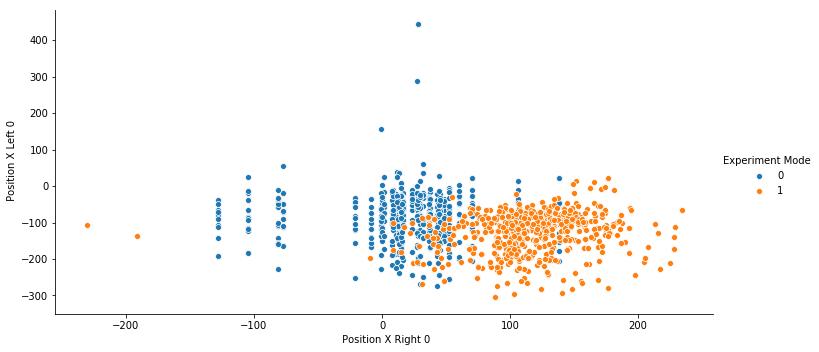

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


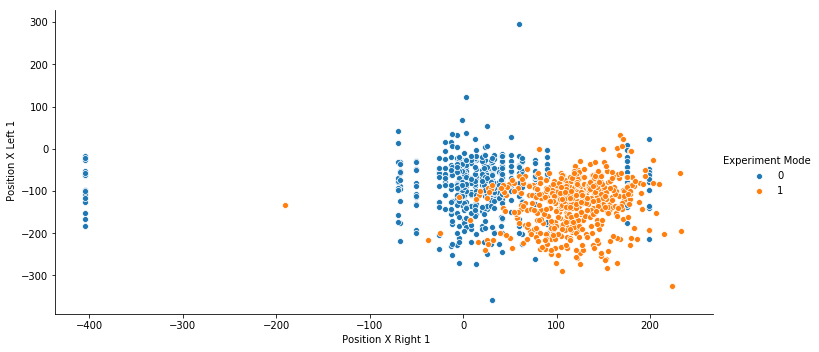

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


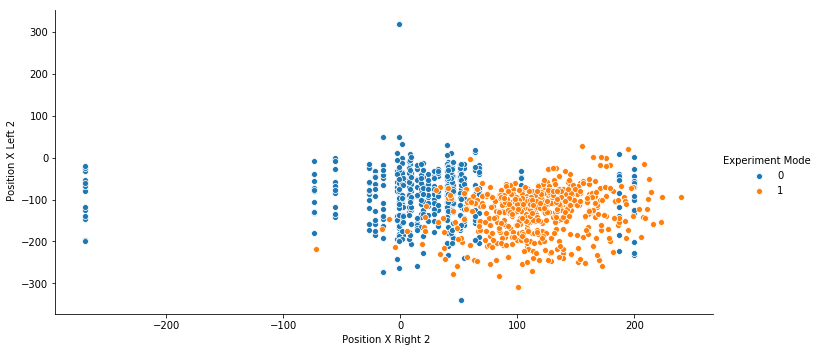

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


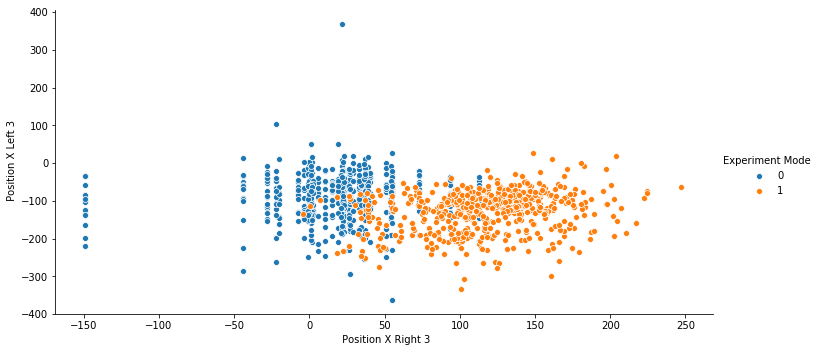

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


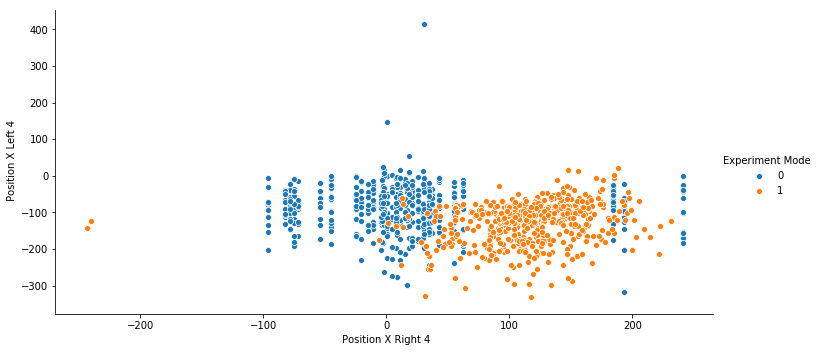

In [36]:
ax0 = sns.pairplot(data=temp, 
                    hue='Experiment Mode',
                    x_vars=[' Position X Right 0'], 
                    y_vars=[' Position X Left 0' ], 
                    size=5, aspect=2);
plt.show()
ax1 = sns.pairplot(data=temp, 
                    hue='Experiment Mode',
                    x_vars=[' Position X Right 1'], 
                    y_vars=[' Position X Left 1' ], 
                    size=5, aspect=2);
plt.show()
ax2 = sns.pairplot(data=temp, 
                    hue='Experiment Mode',
                    x_vars=[' Position X Right 2'], 
                    y_vars=[' Position X Left 2' ], 
                    size=5, aspect=2);
plt.show()
ax3 = sns.pairplot(data=temp, 
                    hue='Experiment Mode',
                    x_vars=[' Position X Right 3'], 
                    y_vars=[' Position X Left 3' ], 
                    size=5, aspect=2);
plt.show()
ax4 = sns.pairplot(data=temp, 
                    hue='Experiment Mode',
                    x_vars=[' Position X Right 4'], 
                    y_vars=[' Position X Left 4' ], 
                    size=5, aspect=2);
plt.show()

In [37]:
temp['Left Velocity Y vector'] = ((temp[' Velocity Y Left 1'] - temp[' Velocity Y Left 0']) 
                                + (temp[' Velocity Y Left 2'] - temp[' Velocity Y Left 1'])
                                + (temp[' Velocity Y Left 3'] - temp[' Velocity Y Left 2'])
                                + (temp[' Velocity Y Left 4'] - temp[' Velocity Y Left 3'])) / (temp['Time 4'] - temp['Time 0'])
                               
temp['Right Velocity Y vector'] = ((temp[' Velocity Y Right 1'] - temp[' Velocity Y Right 0']) 
                                 + (temp[' Velocity Y Right 2'] - temp[' Velocity Y Right 1'])
                                 + (temp[' Velocity Y Right 3'] - temp[' Velocity Y Right 2'])
                                 + (temp[' Velocity Y Right 4'] - temp[' Velocity Y Right 3'])) / (temp['Time 4'] - temp['Time 0'])

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


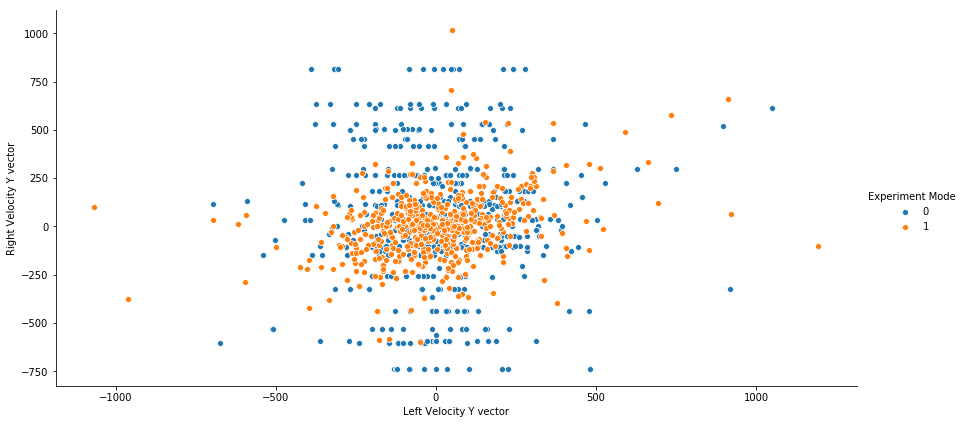

In [38]:
ax1 = sns.pairplot(data=temp, 
                    hue='Experiment Mode',
                    x_vars=["Left Velocity Y vector"], 
                    y_vars=["Right Velocity Y vector" ], 
                    size=6, aspect=2);
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


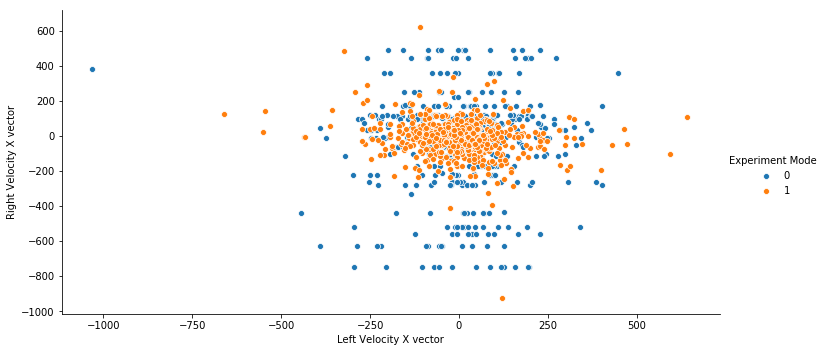

In [39]:
temp['Left Velocity X vector'] = ((temp[' Velocity X Left 1'] - temp[' Velocity X Left 0'])
                                + (temp[' Velocity X Left 2'] - temp[' Velocity X Left 1'])
                                + (temp[' Velocity X Left 3'] - temp[' Velocity X Left 2'])
                                + (temp[' Velocity X Left 4'] - temp[' Velocity X Left 3']))/ (temp['Time 4'] - temp['Time 0'])
                               
temp['Right Velocity X vector'] = ((temp[' Velocity X Right 1'] - temp[' Velocity X Right 0']) 
                                 + (temp[' Velocity X Right 2'] - temp[' Velocity X Right 1'])
                                 + (temp[' Velocity X Right 3'] - temp[' Velocity X Right 2'])
                                 + (temp[' Velocity X Right 4'] - temp[' Velocity X Right 3']))/ (temp['Time 4'] - temp['Time 0'])
ax1 = sns.pairplot(data=temp, 
                    hue='Experiment Mode',
                    x_vars=["Left Velocity X vector"], 
                    y_vars=["Right Velocity X vector" ], 
                    size=5, aspect=2);
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


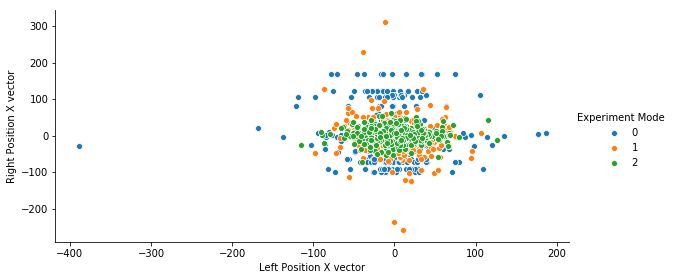

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


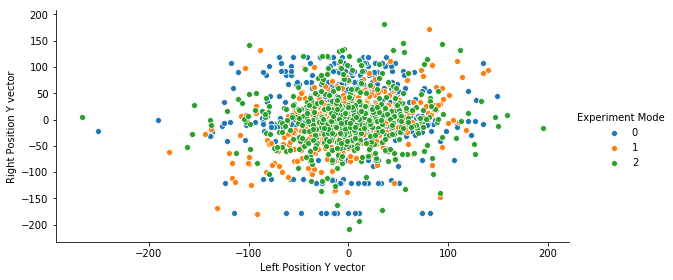

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


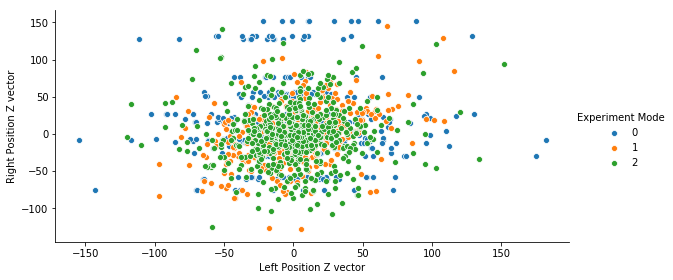

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


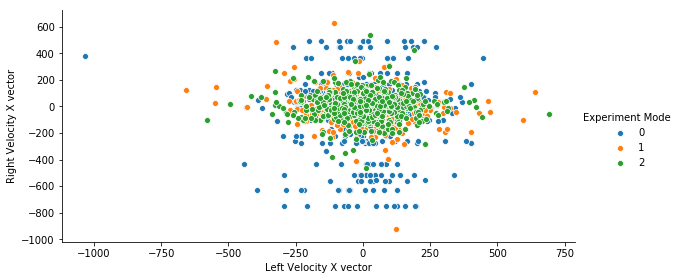

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


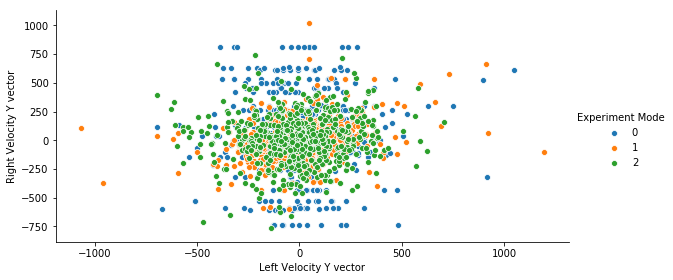

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


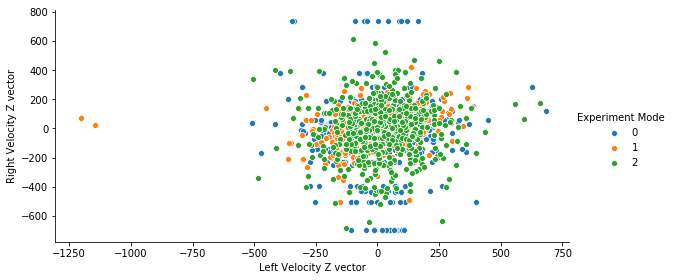

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


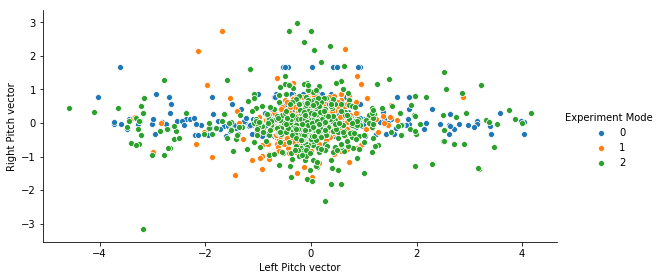

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


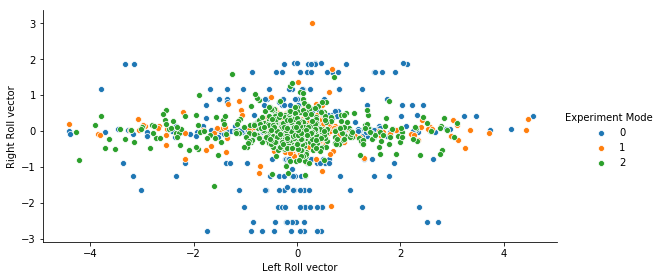

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


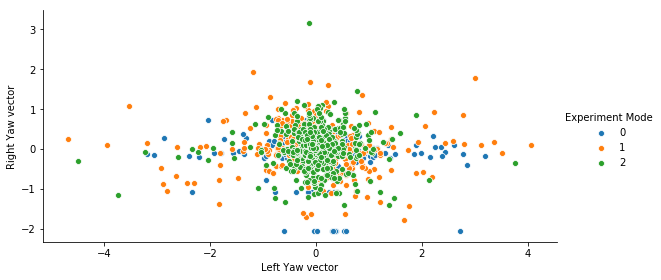

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


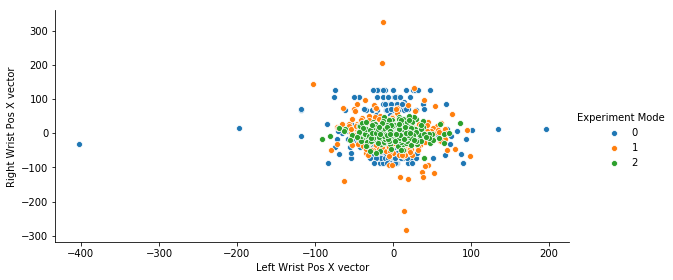

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


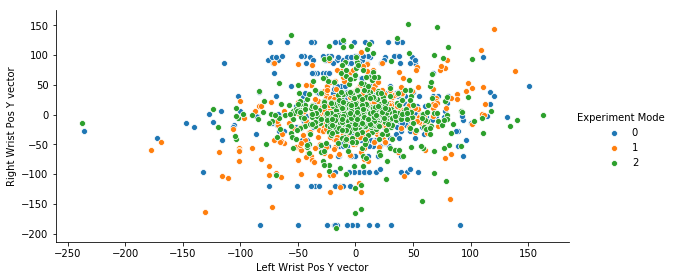

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


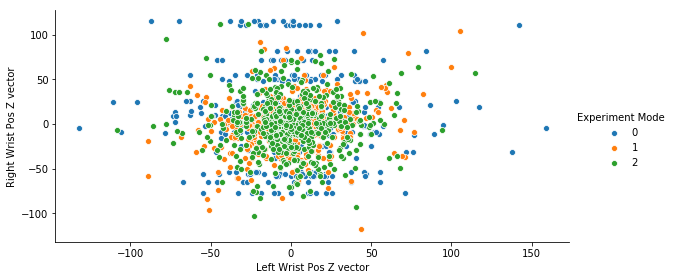

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


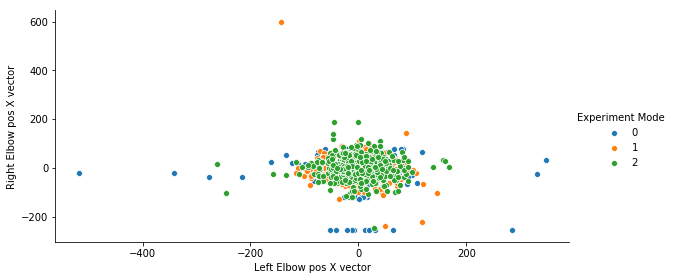

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


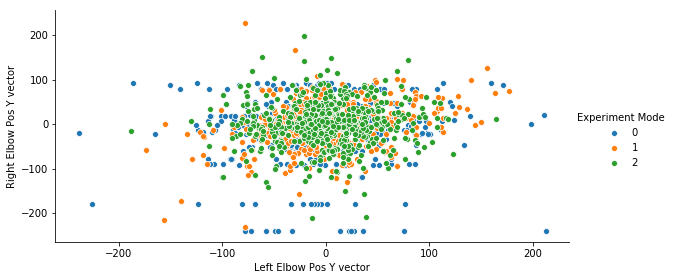

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


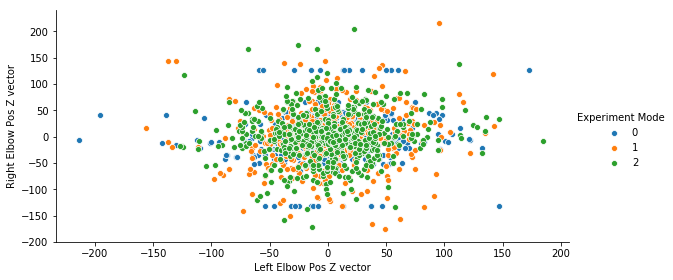

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


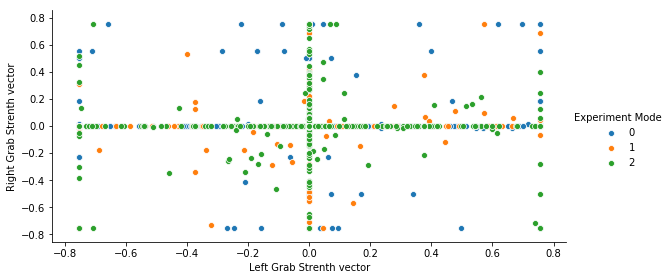

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


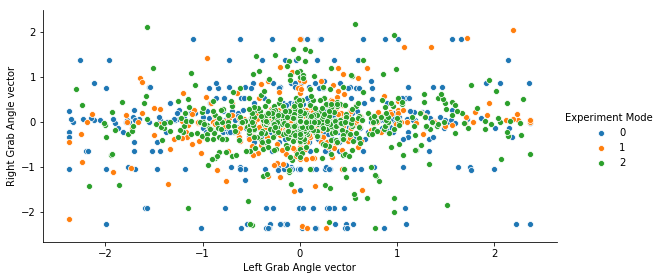

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


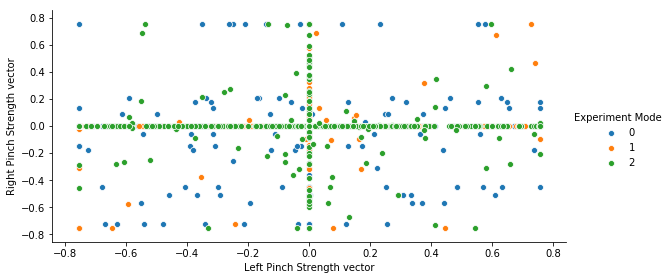

In [40]:
temp = df0.copy()
for x in columns1 :
    temp['Left'+x+' vector'] =   ((temp[x+' Left 1'] - temp[x+' Left 0']) 
                                + (temp[x+' Left 2'] - temp[x+' Left 1'])
                                + (temp[x+' Left 3'] - temp[x+' Left 2'])
                                + (temp[x+' Left 4'] - temp[x+' Left 3']))/ (temp['Time 4'] - temp['Time 0'])
                               
    temp['Right'+x+' vector'] =    ((temp[x+' Right 1'] - temp[x+' Right 0']) 
                                + (temp[x+' Right 2'] - temp[x+' Right 1'])
                                + (temp[x+' Right 3'] - temp[x+' Right 2'])
                                + (temp[x+' Right 4'] - temp[x+' Right 3']))/ (temp['Time 4'] - temp['Time 0'])
    ax1 = sns.pairplot(data=temp,            
                        hue='Experiment Mode',
                        x_vars=['Left'+x+' vector'], 
                        y_vars=['Right'+x+' vector'], 
                        size=4, aspect=2);
    plt.show()

In [41]:
TestDf = df00.copy()

In [42]:
TestingPeopleFolders = ['\Itiel Lab', '\Mor SHerman', '\Oded Medina']

In [43]:
TestingPath = r'C:\Users\user\Desktop\Exel files\semester_2_final\Validation'

In [44]:
for x in TestingPeopleFolders:
    PersonTrainingFiles = glob.glob(TestingPath +x+ "/*.csv")
    NameCunter = NameCunter+1
    for filename in PersonTrainingFiles:
        df = pd.read_csv(filename)
        if 'Alone' in filename:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 0 #'Alone'
            df = get_Alone_df(df)
            
        elif 'Sync' in filename:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 1 #'Sync'
            df = get_Spontan_or_Sync_df(df)
            
        else:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 2 #'Spontan'
            df = get_Spontan_or_Sync_df(df)
            
        df = get_part_of_finaldf(df)
        TestDf = TestDf.append(df.dropna())
        TestDf = nogg(TestDf)

In [45]:
TestDf

,Name,Experiment Mode,Position X Left 0,Position X Right 0,Position Y Left 0,Position Y Right 0,Position Z Left 0,Position Z Right 0,Velocity X Left 0,Velocity X Right 0,...,Elbow Pos Z Left 4,Elbow Pos Z Right 4,Grab Strenth Left 4,Grab Strenth Right 4,Grab Angle Left 4,Grab Angle Right 4,Pinch Strength Left 4,Pinch Strength Right 4,Time 4,Frame ID 4
0,10,2,-153.13400,127.10290,192.9331,113.2914,42.375790,-24.740110,1.381898,46.235730,...,164.89900,255.79750,0.000000,0.000000,1.189606,0.289280,0.953943,0.000000,785.2020,91809
1,10,2,-150.77640,103.38350,212.8092,158.4330,82.541620,3.589153,1.788826,33.734420,...,139.63540,209.57390,0.375480,0.505153,1.828708,1.497572,1.000000,0.000000,786.8586,91999
2,10,2,-155.80010,85.03840,217.7303,172.7979,58.783540,167.849700,-15.920980,-54.917500,...,153.21420,128.50140,0.000000,0.000000,0.258431,0.399461,0.000000,0.000000,788.5157,92190
3,10,2,-187.65010,94.30372,229.0524,177.8015,-0.015033,50.681560,-297.604100,-28.447570,...,153.41000,206.24530,0.000000,0.000000,0.486673,0.059221,0.000000,0.000000,790.1719,92381
4,10,2,-209.80040,89.24201,206.0219,124.7721,32.160640,75.221330,17.331460,44.194840,...,165.73910,190.22600,0.339692,0.000000,1.769297,0.184421,0.000000,0.000000,791.8286,92572
5,10,2,-204.70520,116.92130,289.3085,211.9156,39.209130,38.619630,319.342300,-188.056200,...,110.77770,144.36920,0.000000,0.000000,0.448653,0.058108,0.000000,0.000000,793.4854,92763
6,10,2,-133.85820,110.63360,180.6852,221.5060,41.322550,88.526020,112.455100,25.220910,...,110.32220,138.08050,0.019487,0.000000,1.058709,0.125965,0.000000,0.000000,795.1426,92954
7,10,2,-124.00340,143.03290,172.4615,187.1951,94.084850,50.911970,-22.209620,19.500500,...,83.72482,184.35070,0.000000,0.000000,0.473658,0.761520,0.000000,0.068095,796.7986,93145
8,10,2,-117.87610,160.35880,231.2032,250.4492,94.980670,94.725660,-13.835880,-51.222050,...,103.64030,249.49190,0.000000,0.000000,0.617547,0.682376,0.000000,0.000000,798.4553,93336
9,10,2,-136.18180,115.14830,117.0546,266.5714,56.942490,51.835010,-142.723500,-52.019420,...,129.96790,245.12270,0.000000,0.000000,0.532096,0.113983,0.000000,0.000000,800.1119,93527


In [46]:
# for x in columns1 :
#     df0['Left'+x+' vector'] = ((df0[x+' Left 1'] - df0[x+' Left 0']) 
#                              + (df0[x+' Left 2'] - df0[x+' Left 1'])
#                              + (df0[x+' Left 3'] - df0[x+' Left 2'])
#                              + (df0[x+' Left 4'] - df0[x+' Left 3']))/ (df0['Time 4'] - df0['Time 0'])
                               
#     df0['Right'+x+' vector'] = ((df0[x+' Right 1'] - df0[x+' Right 0']) 
#                               + (df0[x+' Right 2'] - df0[x+' Right 1'])
#                               + (df0[x+' Right 3'] - df0[x+' Right 2'])
#                               + (df0[x+' Right 4'] - df0[x+' Right 3']))/ (df0['Time 4'] - df0['Time 0'])
# for x in columns1 :
#     TestDf['Left'+x+' vector'] = ((TestDf[x+' Left 1'] - TestDf[x+' Left 0']) 
#                                 + (TestDf[x+' Left 2'] - TestDf[x+' Left 1'])
#                                 + (TestDf[x+' Left 3'] - TestDf[x+' Left 2'])
#                                 + (TestDf[x+' Left 4'] - TestDf[x+' Left 3']))/ (TestDf['Time 4'] - TestDf['Time 0'])
                               
#     TestDf['Right'+x+' vector'] =((TestDf[x+' Right 1'] - TestDf[x+' Right 0']) 
#                                 + (TestDf[x+' Right 2'] - TestDf[x+' Right 1'])
#                                 + (TestDf[x+' Right 3'] - TestDf[x+' Right 2'])
#                                 + (TestDf[x+' Right 4'] - TestDf[x+' Right 3']))/ (TestDf['Time 4'] - TestDf['Time 0'])

In [47]:
X_train = df0.drop(['Experiment Mode'],axis=1)
y_train = df0['Experiment Mode']
y_train = y_train.astype('int')
X_test = TestDf.drop(['Experiment Mode'],axis=1)
y_test = TestDf['Experiment Mode']
y_test = y_test.astype('int')

In [48]:
LR = LogisticRegression() 
LR.fit(X_train,y_train)
Accuracy = LR.score(X_test,y_test)
print('LR Accuracy:',int(str(Accuracy*10000)[:4])/100,'%')

LR Accuracy: 86.14 %


In [49]:
nb = GaussianNB()
nb = nb.fit(X_train, y_train)
Accuracy = nb.score(X_test,y_test)
print('GaussianNB Accuracy:',int(str(Accuracy*10000)[:4])/100,'%')

GaussianNB Accuracy: 81.27 %


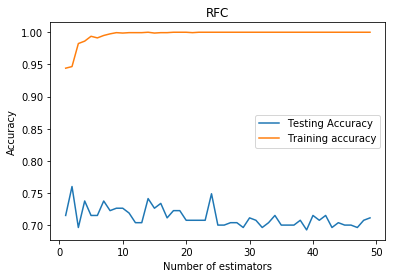

RFC Accuracy: 76.02 %


In [50]:
estimators = np.arange(1,50)
train_accuracy = np.empty(len(estimators))
test_accuracy =  np.empty(len(estimators))
for i,k in enumerate(estimators):
    RFC = RandomForestClassifier(n_estimators=k)
    RFC.fit(X_train, y_train)
    train_accuracy[i] = RFC.score(X_train, y_train)
    test_accuracy[i] = RFC.score(X_test, y_test)
    
plt.title('RFC')
plt.plot(estimators, test_accuracy, label='Testing Accuracy')
plt.plot(estimators, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()
print('RFC Accuracy:',int(str(test_accuracy.max()*10000)[:4])/100,'%')

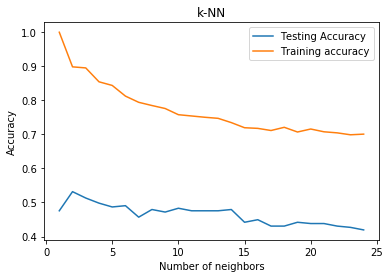

knn Accuracy: 53.18 %


In [51]:
neighbors = np.arange(1,25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title('k-NN')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
print('knn Accuracy:',int(str(test_accuracy.max()*10000)[:4])/100,'%')

In [52]:
SVM = svm.SVC()
SVM.fit(X_train, y_train) 
Accuracy = SVM.score(X_test,y_test)
print('SVM Accuracy:',int(str(Accuracy*10000)[:4])/100,'%')

SVM Accuracy: 33.33 %


In [53]:
df_train = df0.drop(['Experiment Mode'],axis=1).copy()
df_test = TestDf.drop(['Experiment Mode'],axis=1).copy()

scaler = StandardScaler()
scaler.fit(df_train)
df_train = scaler.transform(df_train)
df_test = scaler.transform(df_test)

pca = PCA()
pca.fit(df_train)
df_train = pca.transform(df_train)
df_test = pca.transform(df_test)

In [54]:
SVM = svm.SVC()
SVM = SVM.fit(df_train, y_train) 
Accuracy = SVM.score(df_test,y_test)
print('SVM Accuracy:',int(str(Accuracy*10000)[:4])/100,'%')
# print(SVM.predict(df_test),y_test)

SVM Accuracy: 94.38 %


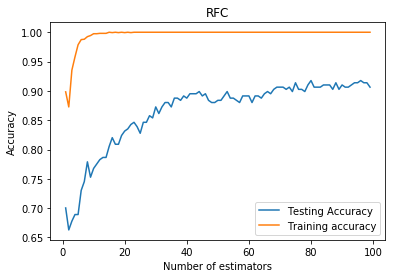

RFC Accuracy: 91.76 %


In [55]:
estimators = np.arange(1,100)
train_accuracy = np.empty(len(estimators))
test_accuracy = np.empty(len(estimators))
max_accuracy = 0
final_RFC = 0 
for i,k in enumerate(estimators):
    RFC = RandomForestClassifier(n_estimators=k, random_state=3)
    RFC.fit(df_train, y_train)
    train_accuracy[i] = RFC.score(df_train, y_train)
    test_accuracy[i] = RFC.score(df_test, y_test)
    
plt.title('RFC')
plt.plot(estimators, test_accuracy, label='Testing Accuracy')
plt.plot(estimators, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()
print('RFC Accuracy:',int(str(test_accuracy.max()*10000)[:4])/100,'%') 
# test_accuracy.argmax()

In [56]:
RFC = RandomForestClassifier(n_estimators=80, random_state=3)
RFC.fit(df_train, y_train)
accuracy = RFC.score(df_test,y_test)
print('RFC Accuracy:',int(str(accuracy*10000)[:4])/100,'%')

RFC Accuracy: 91.76 %


In [57]:
LR = LogisticRegression() 
LR.fit(df_train,y_train)
accuracy = LR.score(df_test,y_test)
print('LR Accuracy:',int(str(accuracy*10000)[:4])/100,'%')

LR Accuracy: 90.63 %


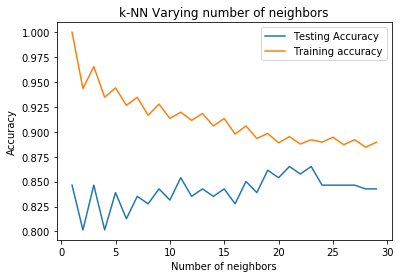

knn Accuracy: 86.51 %


In [58]:
neighbors = np.arange(1,30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df_train, y_train)
    train_accuracy[i] = knn.score(df_train, y_train)
    test_accuracy[i] = knn.score(df_test, y_test)
    
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
print('knn Accuracy:',int(str(test_accuracy.max()*10000)[:4])/100,'%') 

In [59]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(df_train, y_train)
accuracy = knn.score(df_test,y_test)
print('knn Accuracy:',int(str(accuracy*10000)[:4])/100,'%')

knn Accuracy: 86.51 %


In [60]:
nb = GaussianNB()
nb = nb.fit(df_train, y_train)
Accuracy = nb.score(df_test,y_test)
print( 'GaussianNB Accuracy:',int(str(Accuracy*10000)[:4])/100,'%')

GaussianNB Accuracy: 76.4 %


In [61]:
SVM = svm.SVC()
LR = LogisticRegression()
RFC = RandomForestClassifier(n_estimators=80, random_state=3)
# KNN = KNeighborsClassifier(n_neighbors=21)
Voting = VotingClassifier(estimators=[('SVM', SVM), ('RFC', RFC), ('LR', LR)], voting='hard') #('KNN', KNN), 
Voting = Voting.fit(df_train, y_train)
Accuracy = Voting.score(df_test, y_test)
print('Voting Accuracy:', Accuracy)

Voting Accuracy: 0.9550561797752809


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [62]:
def what_status(array):
    cunt_0 = 0
    cunt_1 = 0
    cunt_2 = 0
    for i in range(0,len(array)):
        if(array[i] == 0):
            cunt_0 = cunt_0+1
        if(array[i] == 1):
            cunt_1 = cunt_1+1
        if(array[i] == 2):
            cunt_2 = cunt_2+1
#     print(cunt_0, cunt_1, cunt_2)
    if((cunt_0 > cunt_1) & (cunt_0 > cunt_2)):
        return "Alone"
    if((cunt_1 > cunt_0) & (cunt_1 > cunt_2)):
        return "Sync"
    if((cunt_2 > cunt_0) & (cunt_2 > cunt_1)):
        return "Spontan"
    else:
        return "can't dicide"
    

In [63]:
# for i in TestingPeopleFolders:
    
#     PersonTrainingFiles = glob.glob(TestingPath +i+ "/*.csv")
#     NameCunter = NameCunter+1
#     for filename in PersonTrainingFiles:
#         print ('A new personprediction: ')
#         df = pd.read_csv(filename)
#         if 'Alone' in filename:
#             df['Name'] = NameCunter
#             df['Experiment Mode'] = 0
#             df = get_Alone_df(df)
            
#         elif 'Sync' in filename:
#             df['Name'] = NameCunter
#             df['Experiment Mode'] = 1
#             df = get_Spontan_or_Sync_df(df)
            
#         else:
#             df['Name'] = NameCunter
#             df['Experiment Mode'] = 2
#             df = get_Spontan_or_Sync_df(df)
            
#         df = get_part_of_finaldf(df)
#         df = df.append(df.dropna())
#         df = nogg(df)
#         ddf = df00.copy()
#         ddf = ddf.append(df.dropna())
#         y = ddf['Experiment Mode']
#         y = y.astype('int')
#         x = ddf.drop(['Experiment Mode'], axis=1)
#         x = scaler.transform(x)
#         x = pca.transform(x)
# #         print(df.head(2))
# #         print (SVM.predict(df))
#         print (what_status(Voting.predict(df)))
#         if what_status(Voting.predict(x)) in filename: 
#             print ("The model is right")
#         else:
#             print ("The model is wrong")
#             print ("y: ", y)
#         Accuracy = Voting.score(x,y)
#         print('Voting Accuracy:', int(str(Accuracy*10000)[:4])/100, '%')

In [64]:
for i in TestingPeopleFolders:
    PersonTrainingFiles = glob.glob(TestingPath +i+ "/*.csv")
    NameCunter = NameCunter+1
    for filename in PersonTrainingFiles:
        df = pd.read_csv(filename)
#         print (df.shape)
        if 'Alone' in filename:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 0 #'Alone'
            df = get_Alone_df(df)
            
        elif 'Sync' in filename:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 1 #'Sync'
            df = get_Spontan_or_Sync_df(df)
            
        else:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 2 #'Spontan'
            df = get_Spontan_or_Sync_df(df)
            
        df = get_part_of_finaldf(df)
        ddf = df00.copy()
        ddf = ddf.append(df.dropna())
        y = ddf['Experiment Mode']
        y = y.astype('int')
        x = ddf.drop(['Experiment Mode'], axis=1)
        x = scaler.transform(x)
        x = pca.transform(x)
        SVM = svm.SVC()
        SVM = SVM.fit(df_train, y_train)
        Accuracy = SVM.score(x,y)
        print(SVM.predict(x))
        if 'Alone' in filename:
            print('Alone')
        elif 'Sync' in filename:
            print('Sync')
        else:
            print('Spontan')
        print('SVM Accuracy:', Accuracy)
        if what_status(Voting.predict(x)) in filename: 
            print ("The model is right")
        else:             
            print ("The model is wrong")
        print(" ")

[2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2]
Spontan
SVM Accuracy: 0.8918918918918919
The model is right
 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Sync
SVM Accuracy: 0.9459459459459459
The model is right
 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Alone
SVM Accuracy: 1.0
The model is right
 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Spontan
SVM Accuracy: 1.0
The model is right
 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Sync
SVM Accuracy: 0.918918918918919
The model is right
 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Alone
SVM Accuracy: 1.0
The model is right
 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Alone
SVM Accuracy: 1.0
The model is right
 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1 2 2 1 2 1 2 2 2 2 1 2 2 2 2]
Spontan
SVM Accuracy: 0.7333333333333333
The model is right
 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1 1 1 1 1 1 1 1 1 1 1 1 2 2 1]
Sync
SVM Accuracy: 0.8666666666666667
The model is right
 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [65]:
for i in TestingPeopleFolders:
    PersonTrainingFiles = glob.glob(TestingPath +i+ "/*.csv")
    NameCunter = NameCunter+1
    for filename in PersonTrainingFiles:
        df = pd.read_csv(filename)
#         print (df.shape)
        if 'Alone' in filename:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 0 #'Alone'
            df = get_Alone_df(df)
            
        elif 'Sync' in filename:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 1 #'Sync'
            df = get_Spontan_or_Sync_df(df)
            
        else:
            df['Name'] = NameCunter
            df['Experiment Mode'] = 2 #'Spontan'
            df = get_Spontan_or_Sync_df(df)
            
        df = get_part_of_finaldf(df)
        ddf = df00.copy()
        ddf = ddf.append(df.dropna())
        y = ddf['Experiment Mode']
        y = y.astype('int')
        x = ddf.drop(['Experiment Mode'], axis=1)
        x = scaler.transform(x)
        x = pca.transform(x)
        SVM = svm.SVC()
        LR = LogisticRegression()
        RFC = RandomForestClassifier(n_estimators=80, random_state=3)
        Voting = VotingClassifier(estimators=[('SVM', SVM), ('RFC', RFC), ('LR', LR)], voting='hard')  
        Voting = Voting.fit(df_train, y_train)
        Accuracy = Voting.score(x,y)
        print(Voting.predict(x))
        if 'Alone' in filename:
            print('Alone')
        elif 'Sync' in filename:
            print('Sync')
        else:
            print('Spontan')
        print('Voting Accuracy:', Accuracy)
        if what_status(Voting.predict(x)) in filename: 
            print ("The model is right")
        else:             
            print ("The model is wrong")
        print(" ")

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Spontan
Voting Accuracy: 0.9459459459459459
The model is right
 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
Sync
Voting Accuracy: 0.8648648648648649
The model is right
 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Alone
Voting Accuracy: 1.0
The model is right
 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Spontan
Voting Accuracy: 1.0
The model is right
 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1 1 1 2 1 1 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1]
Sync
Voting Accuracy: 0.7837837837837838
The model is right
 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Alone
Voting Accuracy: 1.0
The model is right
 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Alone
Voting Accuracy: 1.0
The model is right
 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1 1 2 1 2 2 2 2 2 2 1 2 2 2 2]
Spontan
Voting Accuracy: 0.7333333333333333
The model is right
 
[1 1 1 1 1 1 1 1 1 1 1 1 2 1 1]
Sync
Voting Accuracy: 0.9333333333333333
The model is right
 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
